In [1]:
cd ../data

/Users/danqing0703/Google_Drive/research_2017Spring/code_review/social-DCM/data


In [4]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

# Load Data

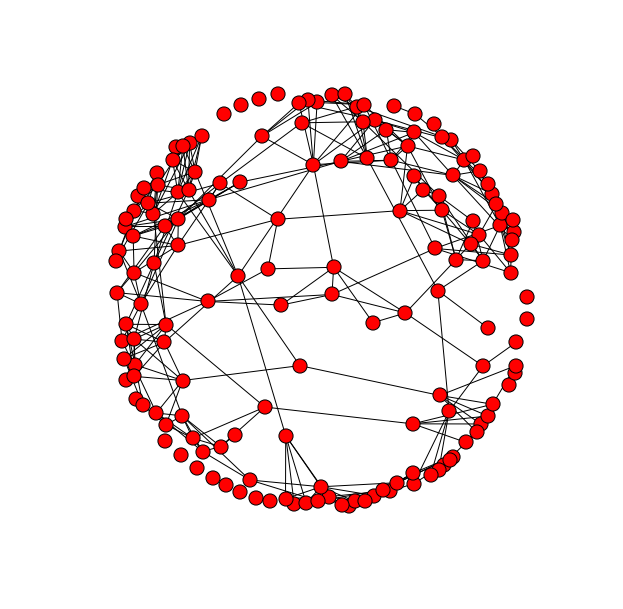

In [5]:
file = open("G3.p",'rb')
G1 = pickle.load(file)
file.close()
file = open("X3.p",'rb')
X = pickle.load(file)
file.close()
file = open("Y3.p",'rb')
y = pickle.load(file)
file.close()
index_change = np.array([ 99,  43,  52,  41,  21,  42,  40,  57,  25, 101,  30,  79,  95,
       126,  71,  74,  28,   7,  17, 113,  44,  93,   2, 124,   3,  38,
       109, 142,  29, 111])
X = np.nan_to_num(X)
plt.figure(3,figsize=(8,8)) 
nx.draw(G1,node_size=200)
file = open("index_changes_30.p",'rb')
index_changes = pickle.load(file)
file.close()

In [6]:
cd ../

/Users/danqing0703/Google_Drive/research_2017Spring/code_review/social-DCM


In [26]:
%load_ext autoreload
%autoreload 2
from __future__ import division
import random
import numpy as np
import numpy.linalg as alg
import scipy as spy
import networkx as nx
import time
from itertools import *
import sys
import numpy.linalg as LA
from src.models.GibbsSampler_networkx import GibbsSampler
from src.models.CVX_weighted import CVX_weighted
from src.models.EM_CVX_pre import EM_CVX_pre
from src.models.EM_Latent_Class import EM_Latent_Class
from scipy.special import expit
from __future__ import division
from src.models.Logistics_Prediction import Logistics_Prediction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# [Model 1] social latent class logistics regression model
## the prediction accuracy of social latent class logistics regression is 76.9%

In [22]:
Lambda = 0.1
Rho = 1
Iterations = 50
num_classes = 2
burn_In = 50

In [ ]:
y_train = np.copy(y)
X_test =  X[index_change]
Y_test =  y[index_change]
for i in range(len(index_change)):
    y_train[index_change[i]] = 0
A = EM_CVX_pre(X, y_train, G1,Lambda, Rho, 2,Iterations,burn_In,index_change,X_test,Y_test)
A.run_EM()

# [Model 2] Logistics Regression
## the prediction accuracy of logistics regression is 65%

In [25]:
L = Logistics_Prediction(X,y,index_changes[1])
L.run_prediction()

prediction accuracy 0.653846153846


# [Model 3] latent class logistics regression
## the prediction accuracy of latent class logistics regression is 69%¶

In [27]:
mask = np.ones(len(X), dtype=bool)
mask[index_change] = False
X_train = X[mask,:]
Y_train = y[mask]
X_test =  X[index_change]
Y_test =  y[index_change]
A = EM_Latent_Class(X_train,Y_train,2,X_test,Y_test)
A.EM()

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


In [28]:
A.predict()
print A.predict_acc

0.692307692308
